### Import Statements

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os , math

In [2]:
# setting seaborn as the default style
sns.set_theme() 

### Define Constants

In [3]:
DATA_FOLDER = "../data/external"
BENIN_MALANVILLE_PATH = os.path.join(DATA_FOLDER , 'benin-malanville.csv')
SIERRALEONE_BUMBUNA_PATH = os.path.join(DATA_FOLDER , 'sierraleone-bumbuna.csv')
TOGO_DAPAONG_PATH = os.path.join(DATA_FOLDER , 'togo-dapaong_qc.csv')

### Load the data

In [4]:
bennin_df = pd.read_csv(BENIN_MALANVILLE_PATH)
sierraleone_df = pd.read_csv(SIERRALEONE_BUMBUNA_PATH)
togo_df = pd.read_csv(TOGO_DAPAONG_PATH)

### Remove null data 

##### Show the percentage of null values for each column of the respective dataframes

In [5]:
# find the percentage of missing values for each column
bennin_total = bennin_df.shape[0]
(bennin_df.isnull().sum() / bennin_total) * 100

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [6]:
# find the percentage of missing values for each column
sierraleone_total = sierraleone_df.shape[0]
(sierraleone_df.isnull().sum() / sierraleone_total) * 100

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [7]:
# find the percentage of missing values for each column
togo_total = togo_df.shape[0]
(togo_df.isnull().sum() / togo_total) * 100

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

##### - It is clear that the column 'Comments' is 100% missing for all of our data so removing it will not cause any harm on further steps. Hence let us remove it

In [8]:
bennin_df = bennin_df.drop(columns=['Comments'])
sierraleone_df = sierraleone_df.drop(columns=['Comments'])
togo_df = togo_df.drop(columns=['Comments'])

### Describe the type of columns

In [9]:
bennin_df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

In [10]:
sierraleone_df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

In [11]:
togo_df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

In [12]:
# categorical columns
CATAGORGICAL_COLS = ["Timestamp" , "Cleaning"]

# quantitative columns
QUANTITATIVE_COLS = [col for col in togo_df.columns if col not in CATAGORGICAL_COLS]

# target columns
TARGET_COLUMNS = ["ModA" , "ModB"]

### Basic Descriptive Statstics

In [13]:
bennin_ds = bennin_df.describe()
bennin_ds

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [14]:
sierraleone_ds = sierraleone_df.describe()
sierraleone_ds

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


In [15]:
togo_ds = togo_df.describe()
togo_ds

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


##### - Plot box plots for each column to show the shape of their distribution

In [16]:
# max number of columns per subplot
MAX_COLUMNS = 6

# calculate the number of rows
num_rows = math.ceil(len(QUANTITATIVE_COLS) / MAX_COLUMNS)

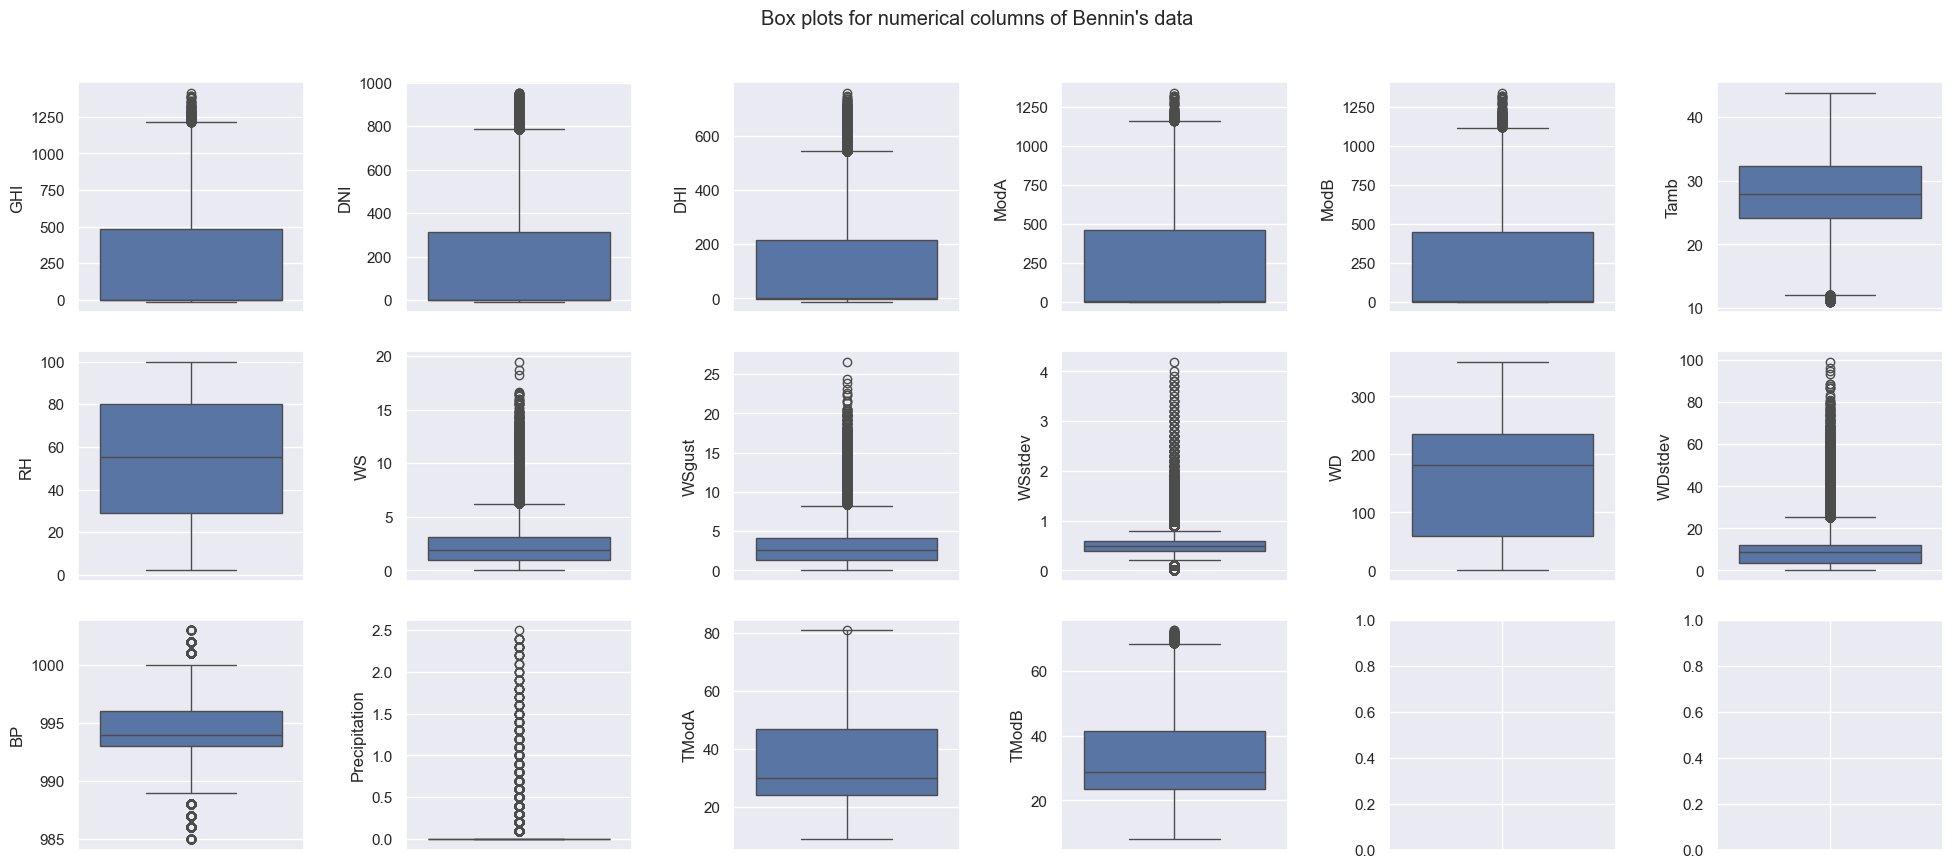

In [27]:
# subplot for bennin_df box plots
fig , axes = plt.subplots(ncols=MAX_COLUMNS , nrows=num_rows , sharex=True , figsize=(20,3 * num_rows) , squeeze=True)
fig.suptitle("Box plots for numerical columns of Bennin's data")

axes = axes.flatten()

for idx, col_name in enumerate(QUANTITATIVE_COLS):
    # Check if col_name exists in the DataFrame
    if col_name in bennin_df.columns:
        sns.boxplot(data=bennin_df[col_name].astype(float), ax=axes[idx], orient='v')
    else:
        print(f"Column {col_name} does not exist in the DataFrame.")

# Adjust spacing between subplots
plt.tight_layout(pad=2)    

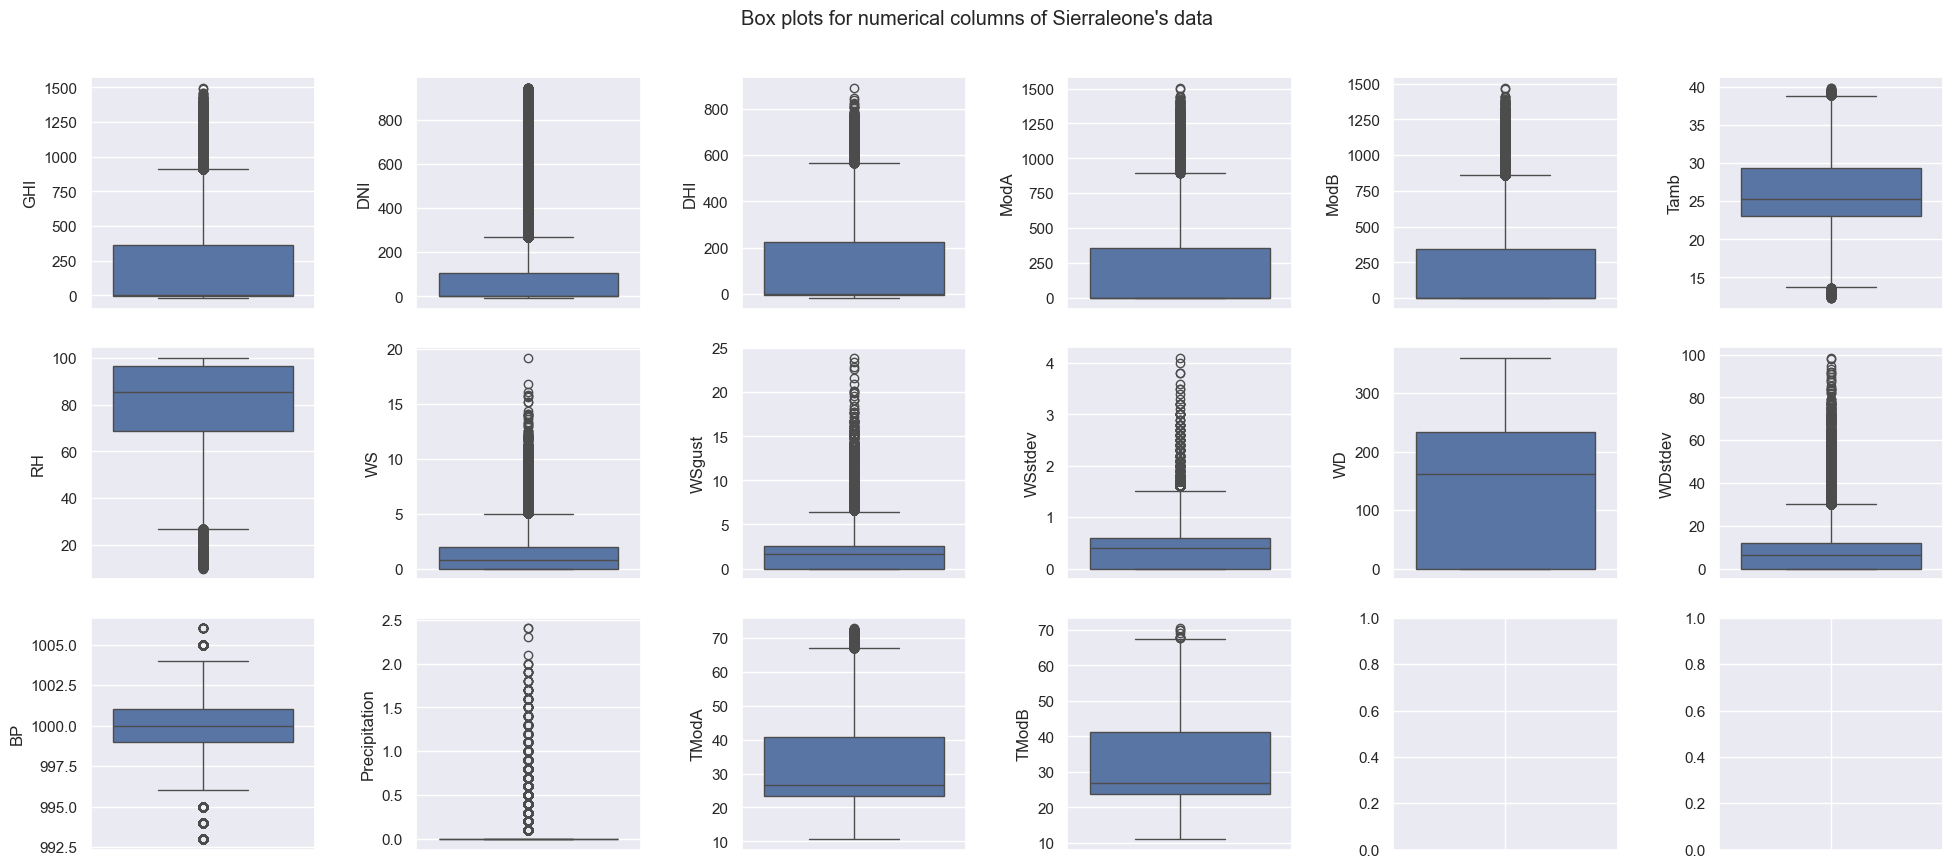

In [26]:
# subplot for sierraleone_df box plots
fig , axes = plt.subplots(ncols=MAX_COLUMNS , nrows=num_rows , sharex=True , figsize=(20,3 * num_rows) , squeeze=True)
fig.suptitle("Box plots for numerical columns of Sierraleone's data")

axes = axes.flatten()

for idx, col_name in enumerate(QUANTITATIVE_COLS):
    # Check if col_name exists in the DataFrame
    if col_name in sierraleone_df.columns:
        sns.boxplot(data=sierraleone_df[col_name].astype(float), ax=axes[idx], orient='v')
    else:
        print(f"Column {col_name} does not exist in the DataFrame.")

# Adjust spacing between subplots
plt.tight_layout(pad=2)

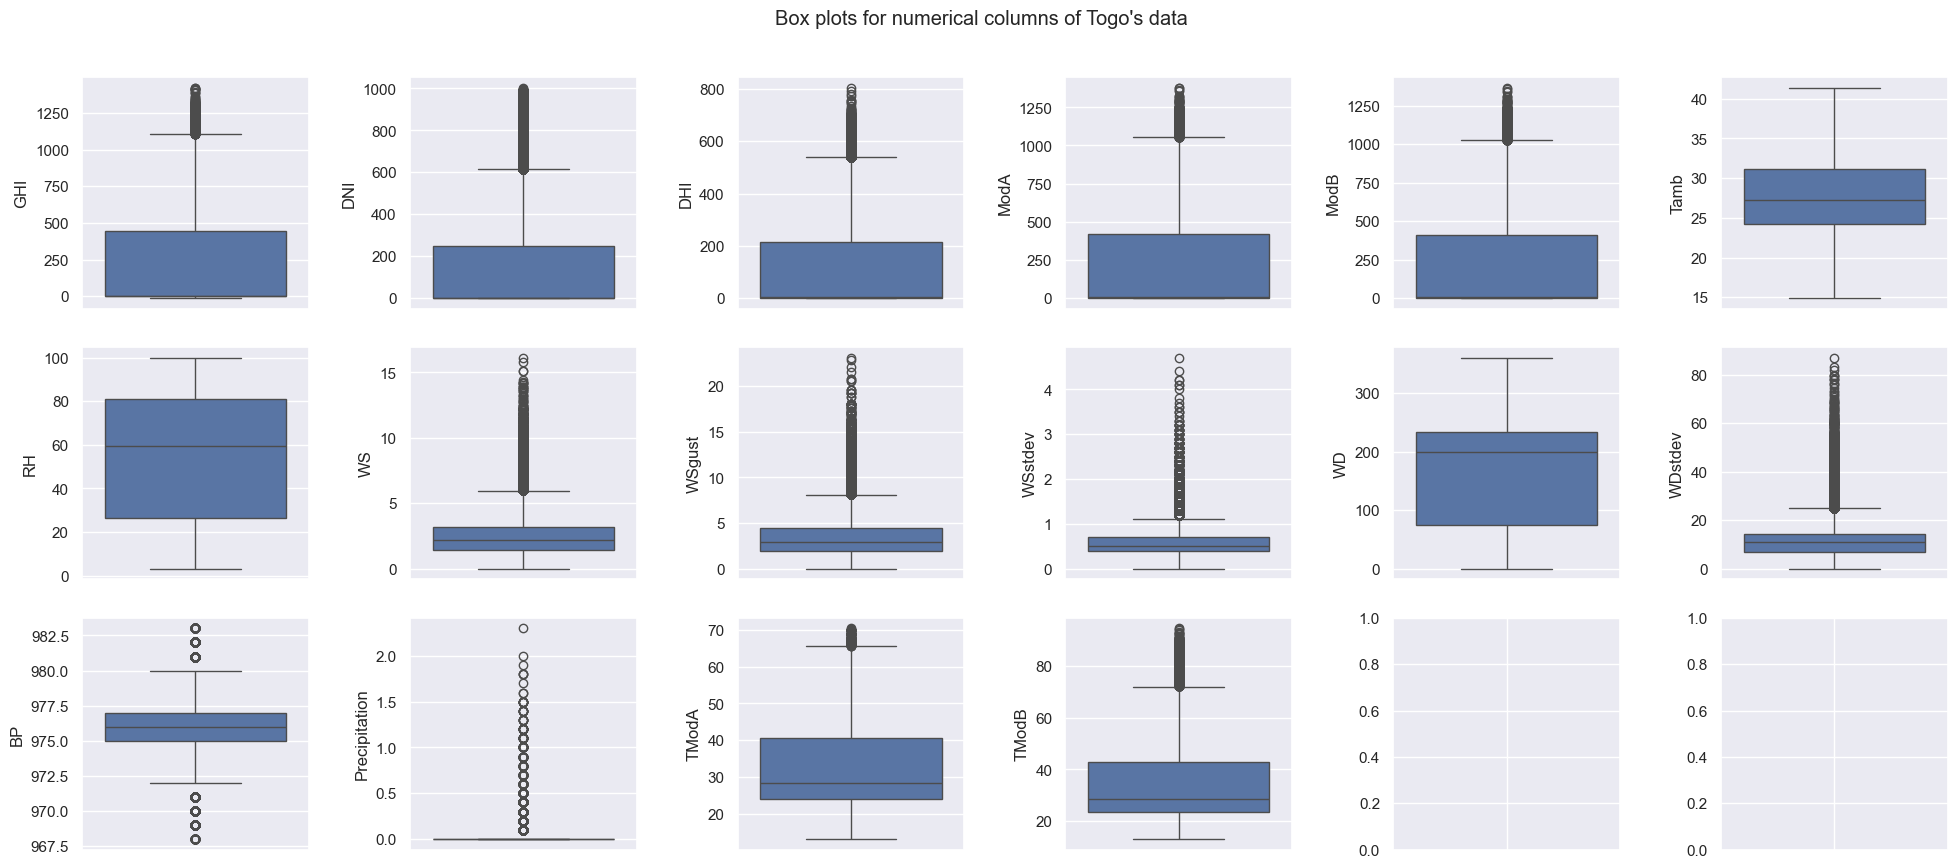

In [25]:
# subplot for togo_df box plots
fig , axes = plt.subplots(ncols=MAX_COLUMNS , nrows=num_rows , sharex=True , figsize=(20,3 * num_rows) , squeeze=True)
fig.suptitle("Box plots for numerical columns of Togo's data")

axes = axes.flatten()

for idx, col_name in enumerate(QUANTITATIVE_COLS):
    # Check if col_name exists in the DataFrame
    if col_name in togo_df.columns:
        sns.boxplot(data=togo_df[col_name].astype(float), ax=axes[idx], orient='v')
    else:
        print(f"Column {col_name} does not exist in the DataFrame.")

# Adjust spacing between subplots
plt.tight_layout(pad=2)

##### From the above plots we can conclude that most of our features don't follow normal distribution , rather they have a right-skewed distribution. And all of the features have outlires that need to be delt with if not explained

### Removing outliers from the data

###  

In [20]:
bennin_df['Timestamp'] = pd.to_datetime(bennin_df['Timestamp'])
bennin_df['Month'] = bennin_df['Timestamp'].dt.month
bennin_df['Hour'] = bennin_df['Timestamp'].dt.hour

In [21]:
sierraleone_df['Timestamp'] = pd.to_datetime(sierraleone_df['Timestamp'])
sierraleone_df['Month'] = sierraleone_df['Timestamp'].dt.month
sierraleone_df['Hour'] = sierraleone_df['Timestamp'].dt.hour

In [22]:
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
togo_df['Month'] = togo_df['Timestamp'].dt.month
togo_df['Hour'] = togo_df['Timestamp'].dt.hour

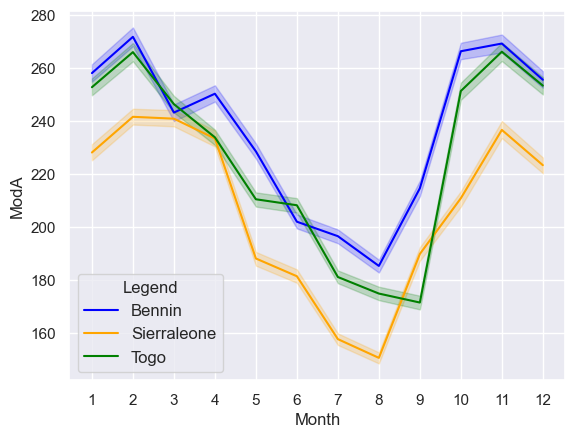

In [23]:
# plot bennin
sns.lineplot(data=bennin_df , x='Month' , y='ModA' , color='blue' , label='Bennin')

# plot sierraleone
sns.lineplot(data=sierraleone_df , x='Month' , y='ModA' , color='orange' , label='Sierraleone')

# plut togo
sns.lineplot(data=togo_df , x='Month' , y='ModA' , color='green' , label='Togo')

# Customize the x-axis to increment by 1
plt.xticks(ticks=range(bennin_df['Month'].min(), bennin_df['Month'].max() + 1, 1))

# show legend
plt.legend(loc='lower left', fontsize='medium', title='Legend')

# Show the plot
plt.show()

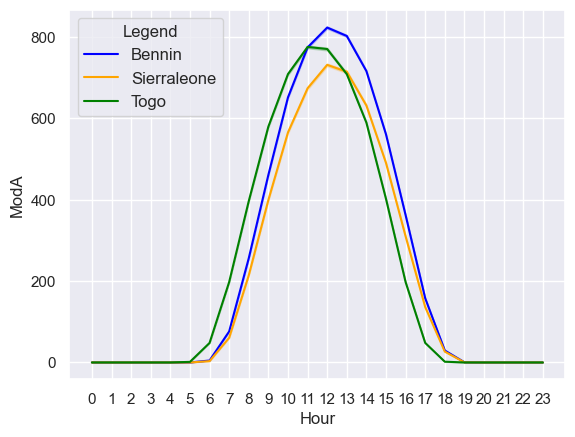

In [24]:
# plot bennin
sns.lineplot(data=bennin_df , x='Hour' , y='ModA' , color='blue' , label='Bennin')

# plot sierraleone
sns.lineplot(data=sierraleone_df , x='Hour' , y='ModA' , color='orange' , label='Sierraleone')

# plut togo
sns.lineplot(data=togo_df , x='Hour' , y='ModA' , color='green' , label='Togo')

# Customize the x-axis to increment by 1
plt.xticks(ticks=range(bennin_df['Hour'].min(), bennin_df['Hour'].max() + 1, 1))

# show legend
plt.legend(loc='upper left', fontsize='medium', title='Legend')

# Show the plot
plt.show()